In [38]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
from IPython.display import display
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix

os.getcwd()
os.chdir('/Users/kylehoward/desktop/thinkful/thinkful-2') 
os.getcwd()

'/Users/kylehoward/Desktop/Thinkful/Thinkful-2'

In [39]:
data = ("FBI_data_4.csv")
fbi = pd.read_csv(data, usecols=[1,2,3,6,8,11,12])
fbi.columns = ['population', 'violent_crime', 'murder', 'robbery', 'prop_crime', 'gta', 'arsen']
fbi = fbi.replace([np.inf, -np.inf], np.nan).dropna()
fbi = fbi[1:]
fbi = fbi.dropna()


categorical = fbi.select_dtypes(include=['object'])

for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

In [40]:
fbi['population'] = fbi['population'].astype(int)
fbi['population_squared'] = fbi['population'] * fbi['population']
fbi['population_squared'].head(10)

1         6640929
2         8099716
6         3171961
7     13993943616
8        90611361
9       330585124
10        4214809
11       20457529
12         432964
13        6360484
Name: population_squared, dtype: int64

In [41]:

fbi['population_sqrt'] = fbi['population'] ** .5
fbi['population_sqrt'] = fbi['population_sqrt'].astype(int)
fbi['population_sqrt'].head(10)

1      50
2      53
6      42
7     343
8      97
9     134
10     45
11     67
12     25
13     50
Name: population_sqrt, dtype: int64

In [42]:
fbi['murder'] = fbi['murder'].astype(int)
fbi['has_murder'] = np.where(fbi['murder']>=1, 1, 0)
fbi['has_murder'].head(10)

1     0
2     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
Name: has_murder, dtype: int64

In [43]:
fbi['robbery'] = fbi['robbery'].astype(int)
fbi['has_robbery'] = np.where(fbi['robbery']>=1, 1, 0)
fbi['arsen'] = fbi['arsen'].astype(int)
fbi['has_robbery'].head(10)

1     0
2     0
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    0
Name: has_robbery, dtype: int64

In [49]:
regr = linear_model.LinearRegression()
#fbi['prop_crime'].astype(int)
#fbi['population_sqrt'].astype(int)
#fbi['violent_crime'].astype(int)
#fbi['arsen'].astype(int)
#fbi['gta'].astype(int)

fbi['prop_crime'] = pd.to_numeric(fbi['prop_crime'], errors='coerce')
fbi['gta'] = pd.to_numeric(fbi['gta'], errors='coerce')
fbi['violent_crime'] = pd.to_numeric(fbi['violent_crime'], errors='coerce')
fbi['arsen'] = pd.to_numeric(fbi['arsen'], errors='coerce')
Y = fbi['prop_crime'].values.reshape(-1, 1)
X = fbi[['gta', 'population_sqrt', 'violent_crime', 'arsen']]
X_training = X[:100]
Y_training = Y[:100]
X_test = X[100:]
Y_test = Y[100:]
regr.fit(X_training, Y_training)
y_pred_test = regr.predict(X_test)
fbi.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 346
Data columns (total 11 columns):
population            186 non-null int64
violent_crime         186 non-null int64
murder                186 non-null int64
robbery               186 non-null int64
prop_crime            186 non-null int64
gta                   186 non-null int64
arsen                 186 non-null int64
population_squared    186 non-null int64
population_sqrt       186 non-null int64
has_murder            186 non-null int64
has_robbery           186 non-null int64
dtypes: int64(11)
memory usage: 22.4 KB


In [50]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_training, Y_training))


Coefficients: 
 [[ 17.30987145   4.02844667  -3.45162097  21.30677974]]

Intercept: 
 [-208.19966493]

R-squared:
0.781025167054


In [51]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, Y_test))


Coefficients: 
 [[ 17.30987145   4.02844667  -3.45162097  21.30677974]]

Intercept: 
 [-208.19966493]

R-squared:
0.916290908524


In [52]:
print('Coefficients: \n', regr.coef_)
print(sklearn.metrics.mean_squared_error(Y_test, y_pred_test))
print(sklearn.metrics.r2_score(Y_test, y_pred_test))

Coefficients: 
 [[ 17.30987145   4.02844667  -3.45162097  21.30677974]]
148324.714285
0.916290908524


In [53]:

plt.scatter(fbi['gta'], fbi['prop_crime'],  color='black')
plt.xlim(0,200)
plt.ylim(0,4000)
plt.loglog(X,Y)
plt.show()

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


OverflowError: cannot convert float infinity to integer

In [13]:
print(Y.shape)
print(fbi['gta'].shape)

(186, 1)
(186,)


In [13]:
outcome = Y
feature = fbi['arsen']
plt.xlim(0,1000)
plt.ylim(0,14000)
plt.loglog()
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/kylehoward/Desktop/Thinkful/anaconda/lib/python3.6/site-packages/matplotlib/transforms.py:383: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]


OverflowError: cannot convert float infinity to integer

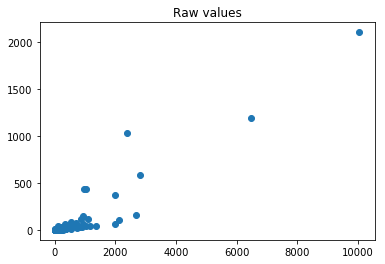

In [15]:
outcome = Y
feature = fbi['violent_crime']

plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

In [16]:
fbi['population_sqrt'].astype(int)
fbi['population_sqrt'].describe

<bound method NDFrame.describe of 1       50.764161
2       53.347915
6       42.201896
7      343.941856
8       97.565363
9      134.840647
10      45.310043
11      67.253253
12      25.651511
13      50.219518
16      86.446515
17      73.607065
19      75.716577
23      37.549967
25      31.968735
26      48.218254
27      45.321077
28      45.442271
29      48.559242
30      89.308454
33      79.937476
34      34.263683
38      47.106263
39     155.450957
42      47.391982
44      27.604347
45     185.639435
46      59.000000
48      31.304952
51      42.836900
          ...    
283    138.989208
287     29.529646
292     49.112117
293     36.755952
295     37.907783
297     49.497475
298     99.979998
300     80.541915
301    224.951106
306     81.160335
309    104.335996
310    379.254532
311    107.000000
313    122.421403
314    241.002075
315    223.378602
317     81.104870
319     24.799194
324    167.152625
326     58.762233
327     76.341339
328     91.607860
335     42.3

In [14]:
fbi.info()
linear_formula = 'property_crime ~ gta+population_sqrt+violent_crime+arsen'
lm = smf.ols(formula=linear_formula, data=data).fit()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 1 to 346
Data columns (total 10 columns):
population            186 non-null int64
violent_crime         186 non-null int64
murder                186 non-null int64
robbery               186 non-null int64
prop_crime            186 non-null int64
gta                   186 non-null int64
arsen                 186 non-null int64
population_squared    186 non-null int64
population_sqrt       186 non-null int64
has_robbery           186 non-null int64
dtypes: int64(10)
memory usage: 21.0 KB


PatsyError: Error evaluating factor: TypeError: string indices must be integers
    property_crime ~ gta+population_sqrt+violent_crime+arsen
                     ^^^

In [62]:
fbi['gta'].dtype

dtype('int64')